In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

# tensorflow 2.0
from tensorflow.keras.models import load_model  
from tensorflow.keras.layers import Dense       
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras import regularizers 
from tensorflow.keras.utils import to_categorical

# sklearn => useful for pre-process
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

print(tf.__version__)

2.0.0


## Raw Data

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


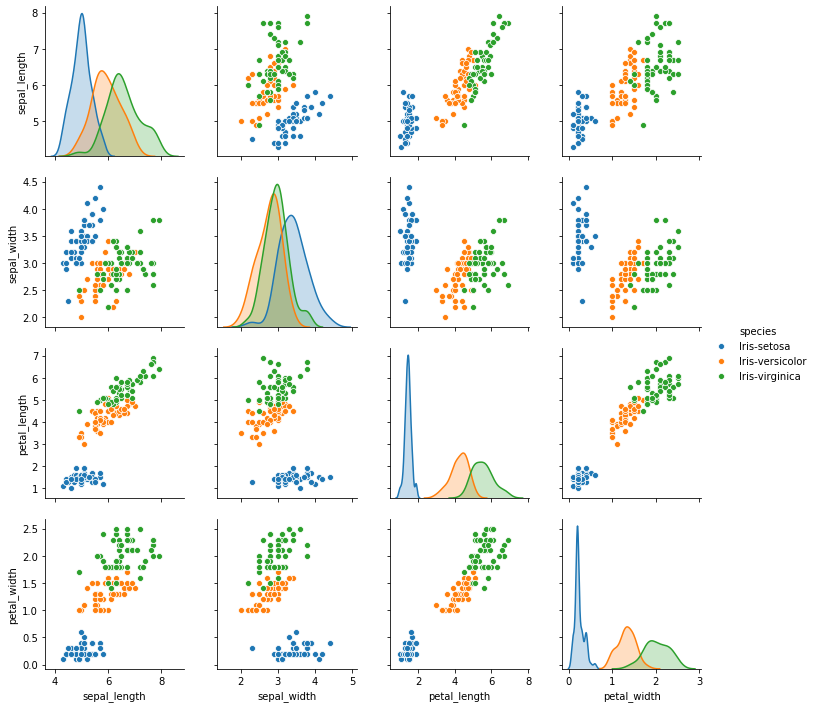

In [4]:
df = pd.read_csv('./iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(df.head())

sb.pairplot(df, hue='species')
plt.show()

## Data Pre-process

In [5]:
data = df.values
print(type(data))
print(len(data))

X = data[:, 0:4].astype(float)
Y_str = data[:, 4]

# LabelEncoder
# Iris-setosa       0
# Iris-versicolor   1
# Iris-virginica    2
encoder = LabelEncoder()
encoder.fit(Y_str)
Y = encoder.transform(Y_str)
print(Y)

# one-hot-encoding 
# n types => n length array (val -> index)
Y_encoded = to_categorical(Y) 

print('')
print('Iris-setosa       0')
print(X[0])         # Iris-setosa  0  [5.1 3.5 1.4 0.2]
print(Y_encoded[0]) # [1. 0. 0.]
 
print('')
print('Iris-versicolor   1')
print(X[50])         # Iris-versicolor  1  [5.9 3.2 4.8 1.8]
print(Y_encoded[50]) # [0. 1. 0.]

print('')
print('Iris-virginica    2')
print(X[100])         # Iris-virginica  2  [7.4 2.8 6.1 1.9]
print(Y_encoded[100]) # [0. 0. 1.]

print('')
print('X.shape =', X.shape)
print('Y_encoded.shape =', Y_encoded.shape)

<class 'numpy.ndarray'>
150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Iris-setosa       0
[5.1 3.5 1.4 0.2]
[1. 0. 0.]

Iris-versicolor   1
[5.  2.  3.5 1. ]
[0. 1. 0.]

Iris-virginica    2
[6.5 3.2 5.1 2. ]
[0. 0. 1.]

X.shape = (150, 4)
Y_encoded.shape = (150, 3)


## Sample Train/Test Data

In [6]:
seed = 0
# split data => test 90%, validation 10%
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y_encoded,
                                                            stratify=Y_encoded,
                                                            test_size=0.1,
                                                            random_state=seed)
# split test data(85%) => test 90%, validation 10%
x_train, x_val, y_train, y_val = train_test_split(x_train_all,
                                                  y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.1,
                                                  random_state=seed)

print(y_val)
print(y_val.shape)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
(14, 3)


In [7]:
model = Sequential()

model.add(Dense(64, input_shape=(4, ), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax')) # result => probability of 3 classes (p1 + p2 + p3 = 1)

model.compile(optimizer='adam', loss='binary_crossentropy', 
                                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)

# batch_size => related to effects of outlier (-)
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, 
                 batch_size=5, callbacks=[early_stopping])

Train on 121 samples, validate on 14 samples
Epoch 1/1000
121/121 [==============================] - 1s 8ms/sample - loss: 0.5634 - accuracy: 0.7466 - val_loss: 0.4552 - val_accuracy: 0.8571
Epoch 2/1000
121/121 [==============================] - 0s 405us/sample - loss: 0.3973 - accuracy: 0.8540 - val_loss: 0.3633 - val_accuracy: 0.8810
Epoch 3/1000
121/121 [==============================] - 0s 388us/sample - loss: 0.3304 - accuracy: 0.8485 - val_loss: 0.3312 - val_accuracy: 0.8810
Epoch 4/1000
121/121 [==============================] - 0s 405us/sample - loss: 0.2939 - accuracy: 0.8815 - val_loss: 0.2779 - val_accuracy: 0.8333
Epoch 5/1000
121/121 [==============================] - 0s 413us/sample - loss: 0.2613 - accuracy: 0.9311 - val_loss: 0.2505 - val_accuracy: 0.9048
Epoch 6/1000
121/121 [==============================] - 0s 413us/sample - loss: 0.2342 - accuracy: 0.9614 - val_loss: 0.2225 - val_accuracy: 1.0000
Epoch 7/1000
121/121 [==============================] - 0s 405us/samp

Epoch 56/1000
121/121 [==============================] - 0s 388us/sample - loss: 0.0587 - accuracy: 0.9835 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 57/1000
121/121 [==============================] - 0s 388us/sample - loss: 0.0567 - accuracy: 0.9835 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 58/1000
121/121 [==============================] - 0s 380us/sample - loss: 0.0545 - accuracy: 0.9835 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 59/1000
121/121 [==============================] - 0s 405us/sample - loss: 0.0702 - accuracy: 0.9614 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 60/1000
121/121 [==============================] - 0s 388us/sample - loss: 0.0615 - accuracy: 0.9725 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 61/1000
121/121 [==============================] - 0s 380us/sample - loss: 0.0610 - accuracy: 0.9780 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 62/1000
121/121 [==============================] - 0s 372us/sample - loss: 0.0577 - accuracy: 0.9835

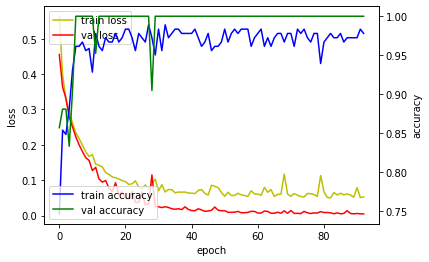

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [8]:
fig, loss_ax = plt.subplots()

# double y-axis
acc_ax = loss_ax.twinx() 

# y-axis (left)
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# y-axis (right)
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
#acc_ax.set_ylim([0.0, 1.0])

# axis labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()
model.summary()

In [9]:
model.save('./iris_model.h5')

In [24]:
pd = model.predict(x_test)
print('pd.shaep=', pd.shape)
print('Actual =', x_test[0])
print('Predicted P =', pd[0], sep=' ')
print('Actual One-Hot Encoding = ', y_test[0])
print(np.argmax(pd[0]))

for i in range(len(x_test)):
    i_species = np.argmax(pd[i])
    pd_species = encoder.inverse_transform(np.array([i_species]))
    if y_test[i][i_species] == 1:
        print(i, 'success =>', 'species =', pd_species[0], sep=' ')
    else:
        print(i, 'error')
        

pd.shaep= (15, 3)
Actual = [6.7 3.1 4.4 1.4]
Predicted P = [4.4075254e-04 9.9936312e-01 1.9604065e-04]
Actual One-Hot Encoding =  [0. 1. 0.]
1
0 success => species = Iris-versicolor
1 success => species = Iris-virginica
2 success => species = Iris-versicolor
3 success => species = Iris-virginica
4 success => species = Iris-setosa
5 success => species = Iris-virginica
6 success => species = Iris-virginica
7 success => species = Iris-versicolor
8 success => species = Iris-versicolor
9 success => species = Iris-setosa
10 success => species = Iris-virginica
11 success => species = Iris-setosa
12 success => species = Iris-setosa
13 success => species = Iris-setosa
14 success => species = Iris-versicolor


In [20]:
df2 = pd.read_csv('./iris_test.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(df2.head())

data2 = df2.values
print(type(data2))
print(len(data2))

X2 = data2[:, 0:4].astype(float)
Y_str2 = data2[:, 4]
        
encoder = LabelEncoder()
encoder.fit(Y_str2)
Y2 = encoder.transform(Y_str2)
Y_encoded2 = to_categorical(Y2) 
print(Y2)    
print(Y_encoded2)    


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.0          3.5           1.3          0.3  Iris-setosa
1           4.5          2.3           1.3          0.3  Iris-setosa
2           4.4          3.2           1.3          0.2  Iris-setosa
3           5.0          3.5           1.6          0.6  Iris-setosa
4           5.1          3.8           1.9          0.4  Iris-setosa
<class 'numpy.ndarray'>
30
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [18]:
pd2 = model.predict(X2)

print('pd.shaep=', pd.shape)
print('Actual =', x_test[0])
print('Predicted P =', pd[0], sep=' ')
print('Actual One-Hot Encoding = ', y_test[0])
print(np.argmax(pd[0]))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.0          3.5           1.3          0.3  Iris-setosa
1           4.5          2.3           1.3          0.3  Iris-setosa
2           4.4          3.2           1.3          0.2  Iris-setosa
3           5.0          3.5           1.6          0.6  Iris-setosa
4           5.1          3.8           1.9          0.4  Iris-setosa
<class 'numpy.ndarray'>
30
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]


In [30]:
# input
# 5.1,3.5,1.4,0.2
src = input('Please Enter : "sepal_length", "sepal_width", "petal_length", "petal_width"')
print(type(src))
print(src)

# 1-dimension tensor
data = np.array(src.split(','), dtype=float)
print(data.shape)
print(data)

X = np.array([data])
print(X.shape)
print(X)

# 2-dimension array
pd = model.predict(X)
print('pd:', pd)

def decode(hot_encode):
    label_encode = np.argmax(hot_encode)
    labels = encoder.inverse_transform(np.array([label_encode]))
    return labels[0]

for i in range(len(pd)):
    print('predicted species:', decode(pd[i]))

Please Enter : "sepal_length", "sepal_width", "petal_length", "petal_width"5.1,3.5,1.4,0.2
<class 'str'>
5.1,3.5,1.4,0.2
(4,)
[5.1 3.5 1.4 0.2]
(1, 4)
[[5.1 3.5 1.4 0.2]]
pd: [[9.9978179e-01 2.1827391e-04 3.7067680e-12]]
predicted species: Iris-setosa
